### 作業
目前已經學過許多的模型，相信大家對整體流程應該比較掌握了，這次作業請改用**手寫辨識資料集**，步驟流程都是一樣的，請試著自己撰寫程式碼來完成所有步驟

In [1]:
from sklearn import datasets, metrics
digits = datasets.load_digits()

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [8]:
print(digits.data.shape)
print(np.unique(digits.target_names))

(1797, 64)
[0 1 2 3 4 5 6 7 8 9]


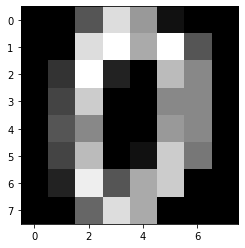

In [13]:
plt.imshow(digits.images[0], cmap="gray")

In [35]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = .2, random_state = 4)
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=18 ,min_samples_leaf=5, max_depth=8, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test1, n_jobs=4, iid=False, cv=5)
gsearch1.fit(x_train, y_train)

/home/wan-chu/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=8,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=5,
                                                  min_samples_split=18,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

In [36]:
gsearch1.cv_results_, gsearch1.best_estimator_, gsearch1.best_score_

({'mean_fit_time': array([1.40611005, 1.90230007, 2.51710796, 2.87793498, 3.11091528,
         3.34283452, 3.2518898 ]),
  'std_fit_time': array([0.10006338, 0.07055689, 0.08620322, 0.04036184, 0.03478634,
         0.02717588, 0.3254549 ]),
  'mean_score_time': array([0.00527029, 0.00740533, 0.00908194, 0.0116888 , 0.01197815,
         0.01175113, 0.01056991]),
  'std_score_time': array([6.37854856e-05, 2.44201312e-04, 1.74270419e-04, 2.20411814e-03,
         5.02545941e-04, 2.94902384e-04, 1.46105301e-03]),
  'param_n_estimators': masked_array(data=[20, 30, 40, 50, 60, 70, 80],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 20},
   {'n_estimators': 30},
   {'n_estimators': 40},
   {'n_estimators': 50},
   {'n_estimators': 60},
   {'n_estimators': 70},
   {'n_estimators': 80}],
  'split0_test_score': array([0.96180556, 0.97569444, 0.97916667, 0.97916667, 0.97916667,
         0.97

In [37]:
param_test2 = {'max_depth':range(3,15,2), 'min_samples_split':range(10,30,5)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_leaf=5, max_features='sqrt', subsample=0.8, random_state=10, n_estimators=50), 
param_grid = param_test2, n_jobs=4, iid=False, cv=5)
gsearch2.fit(x_train, y_train)

gsearch2.cv_results_, gsearch2.best_estimator_, gsearch2.best_score_

/home/wan-chu/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([1.59892044, 1.54557447, 1.33122387, 1.28451571, 2.26923213,
         1.91495833, 2.07769656, 2.00123324, 2.71727629, 2.60048847,
         2.67861156, 2.97486339, 3.64066896, 3.5450346 , 3.7556891 ,
         3.29575691, 4.19476032, 3.8124907 , 3.78612547, 3.31501279,
         4.50110869, 3.99445057, 3.91897397, 3.50734763]),
  'std_fit_time': array([0.06623553, 0.11115698, 0.078605  , 0.01936687, 0.19429841,
         0.03505542, 0.12056282, 0.12939221, 0.02405703, 0.06144406,
         0.16935657, 0.09937688, 0.14820533, 0.48047479, 0.16275147,
         0.07586737, 0.13829593, 0.11968514, 0.15277154, 0.15206027,
         0.15548459, 0.10078664, 0.06071046, 0.11869037]),
  'mean_score_time': array([0.0054987 , 0.00538259, 0.00536499, 0.00575008, 0.0080039 ,
         0.00758862, 0.00762105, 0.00830197, 0.01025872, 0.00998507,
         0.01024923, 0.01121149, 0.01229963, 0.01340079, 0.01606884,
         0.01373262, 0.01367531, 0.01360006, 0.01314015, 0.01267428,
  

In [38]:
param_test3 = {'min_samples_leaf':range(5,71,5), 'max_features':range(7,64,4)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=25,n_estimators=50,
                                                               max_depth = 7, subsample=0.8, random_state=10), 
param_grid = param_test3, n_jobs=4, iid=False, cv=5)
gsearch3.fit(x_train, y_train)

gsearch3.cv_results_, gsearch3.best_estimator_, gsearch3.best_score_

/home/wan-chu/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([2.43941588, 2.35865831, 2.31602187, 2.20245061, 1.87366862,
         1.82434225, 1.71643109, 1.64611449, 1.57843285, 1.52275047,
         1.55168695, 1.69523101, 1.65159717, 1.51530304, 2.62176905,
         2.9441999 , 2.69071383, 2.50878105, 2.54338083, 2.23900909,
         2.14741445, 2.0822578 , 2.00851908, 2.14112687, 1.99876943,
         1.82041907, 1.81287961, 1.88682718, 3.11707358, 3.07885275,
         2.97281389, 2.99978557, 2.6775558 , 2.55331526, 2.56993055,
         2.84590945, 2.66226544, 2.52951241, 2.42179208, 2.43747344,
         2.66782842, 2.58906713, 4.40227451, 3.9223434 , 3.32286077,
         3.64303336, 4.05142341, 4.47150698, 3.10865822, 2.67555866,
         2.58916497, 2.46414871, 2.38671603, 2.32679639, 2.25998874,
         2.20940514, 4.37916656, 4.19807544, 4.08739891, 3.82736969,
         3.59838433, 3.30449276, 3.68193779, 3.74591146, 3.03310938,
         2.85629196, 3.04411993, 2.65548773, 2.66919117, 2.67144403,
         4.222277

In [55]:
param_test4 = {'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1], 'max_features':range(5,10,1)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=25, n_estimators=50,
                                                               max_depth = 7, min_samples_leaf=15, random_state=10), 
param_grid = param_test4, n_jobs=4, iid=False, cv=5)
gsearch4.fit(x_train, y_train)

gsearch4.cv_results_, gsearch4.best_estimator_, gsearch3.best_score_

/home/wan-chu/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([1.93111281, 2.01306686, 1.99724841, 2.05609956, 2.27256923,
         2.29701462, 2.36780949, 1.97173128, 2.02763205, 2.08671346,
         2.14725199, 2.2209733 , 2.25028992, 2.35039649, 2.18945541,
         2.32473617, 2.36375694, 2.43584323, 2.55520296, 2.62293181,
         2.63399048, 2.28748617, 2.38666797, 2.44869771, 2.51319962,
         2.58357744, 2.71483154, 2.87486839, 2.38399005, 2.46760864,
         2.54658451, 2.60365105, 2.68311653, 2.75637279, 2.58732972]),
  'std_fit_time': array([0.06068343, 0.09240963, 0.01373045, 0.02484384, 0.07513297,
         0.03394715, 0.06337018, 0.03294012, 0.03842528, 0.04054679,
         0.03951164, 0.04787926, 0.04049549, 0.04358849, 0.03876044,
         0.05169311, 0.03611424, 0.04445304, 0.03135083, 0.06068666,
         0.0539584 , 0.03969259, 0.0534367 , 0.04218526, 0.05752957,
         0.04647404, 0.10461002, 0.05823343, 0.02414034, 0.01482253,
         0.03046034, 0.03379515, 0.03184905, 0.0444653 , 0.45452063]

In [49]:
def modelfit(alg, x_train, y_train, x_test, y_test, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(x_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(x_test)
    #dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, x_train, y_train, cv=cv_folds)
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(y_test, dtrain_predictions))
    #print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob)
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    #if printFeatureImportance:
     #   feat_imp = pd.Series(alg.feature_importances_, y_train).sort_values(ascending=False)
     #   feat_imp.plot(kind='bar', title='Feature Importances')
     #   plt.ylabel('Feature Importance Score')

In [50]:
from sklearn.model_selection import cross_val_score
import pandas as pd
modelfit(gsearch3.best_estimator_, x_train, y_train, x_test, y_test)


Model Report
Accuracy : 0.9806
CV Score : Mean - 0.9742451 | Std - 0.01093674 | Min - 0.9547038 | Max - 0.9861111


In [51]:
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100, 
                                         max_depth=7, min_samples_split=25,min_samples_leaf=15, subsample=0.8, random_state=10, max_features=7)
modelfit(gbm_tuned_1, x_train, y_train, x_test, y_test)


Model Report
Accuracy : 0.9889
CV Score : Mean - 0.9749298 | Std - 0.01312006 | Min - 0.9581882 | Max - 0.9965278
